 Task 1: Data Quality Assessment + Visuals

Shape: (120, 9)
Memory Usage: 0.02 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           120 non-null    int64 
 1   Age                  120 non-null    int64 
 2   Gender               120 non-null    object
 3   AnnualIncome         120 non-null    int64 
 4   SpendingScore        120 non-null    int64 
 5   BrowserType          120 non-null    object
 6   PurchaseFrequency    120 non-null    int64 
 7   LastPurchaseDaysAgo  120 non-null    int64 
 8   DeviceType           120 non-null    object
dtypes: int64(6), object(3)
memory usage: 8.6+ KB
None
Duplicate Rows: 0

Data Types:
 CustomerID              int64
Age                     int64
Gender                 object
AnnualIncome            int64
SpendingScore           int64
BrowserType            object
PurchaseFrequency       int64
LastPurchaseDaysAgo   

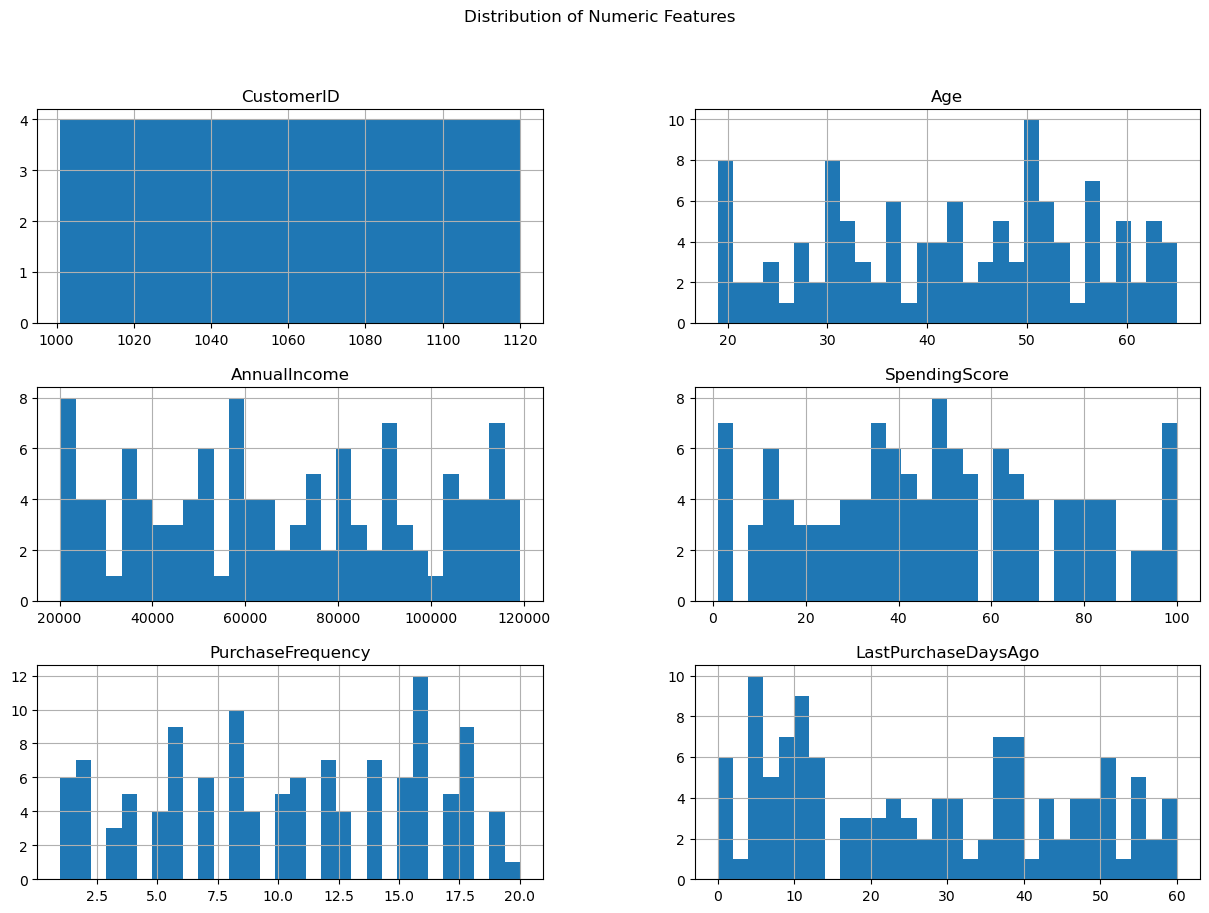

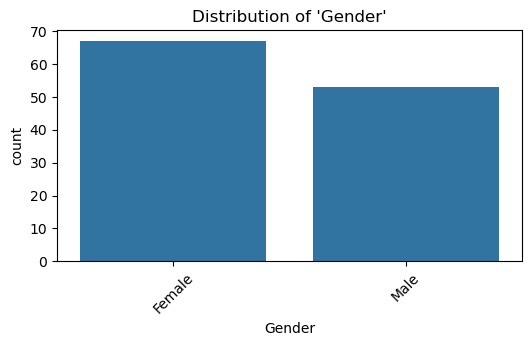

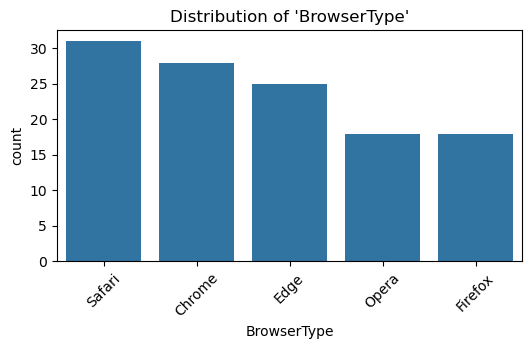

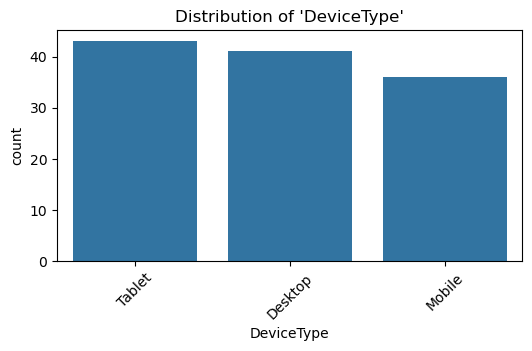

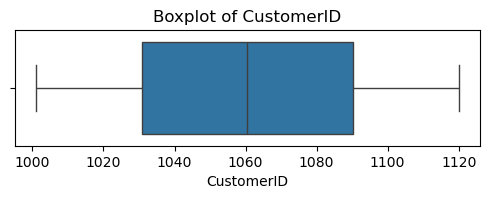

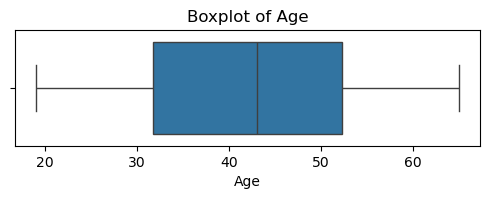

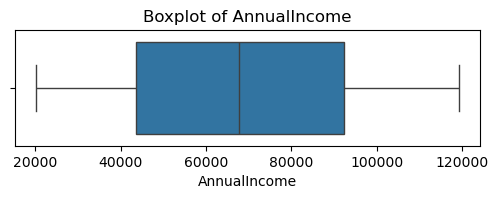

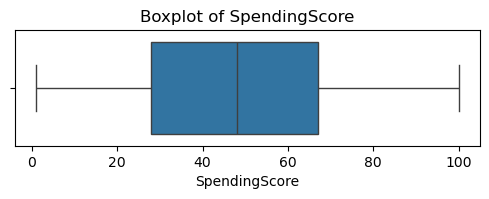

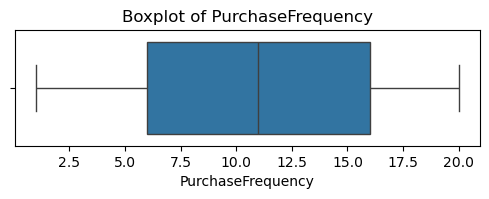

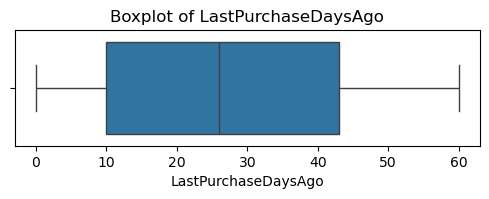

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("ecommerce_customers_large.csv")

# Basic Info
print("Shape:", df.shape)
print("Memory Usage: {:.2f} MB".format(df.memory_usage(deep=True).sum() / 1024**2))
print(df.info())

# Missing Values Visualization
missing = df.isnull().sum()
missing = missing[missing > 0]
if not missing.empty:
    plt.figure(figsize=(10, 4))
    sns.barplot(x=missing.index, y=missing.values)
    plt.title("Missing Values per Column")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()

# Duplicates
dupe_count = df.duplicated().sum()
print(f"Duplicate Rows: {dupe_count}")

# Data Types
print("\nData Types:\n", df.dtypes)

# Numeric Summary
print(df.describe())

# Histogram for Numeric Columns
df.select_dtypes(include='number').hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribution of Numeric Features")
plt.show()

# Categorical Distributions
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of '{col}'")
    plt.xticks(rotation=45)
    plt.show()

# Range Check (Boxplot)
for col in df.select_dtypes(include=['int', 'float']):
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Task 2: Data Cleaning (with Optional Visualization)

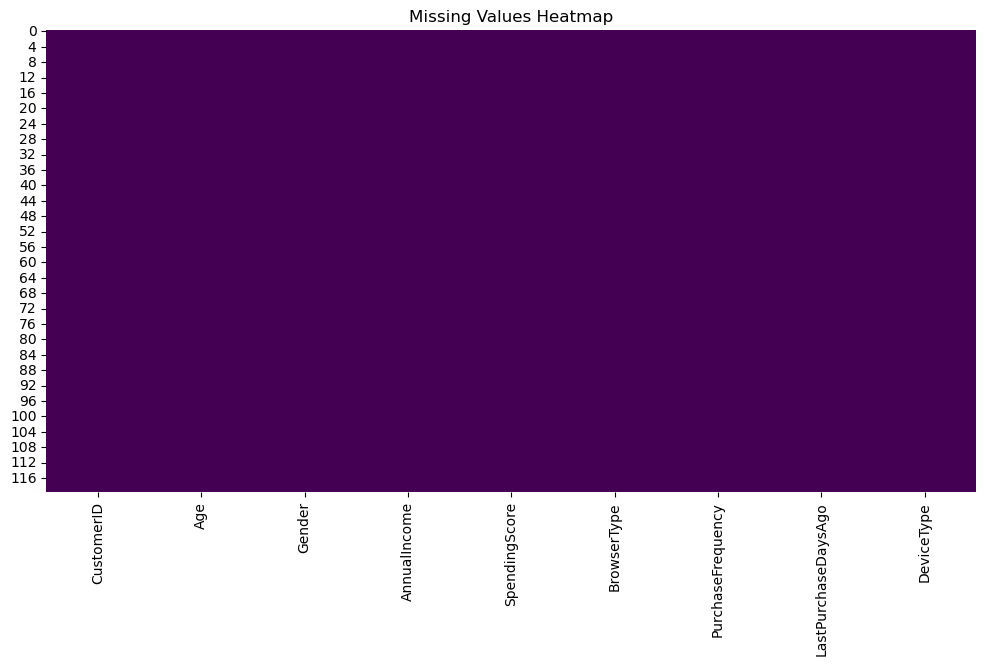

In [7]:
# Heatmap of Missing Values (Before Cleaning)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("ecommerce_customers_large.csv")

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# After cleaning, validate with:




Task 3: Outlier Detection & Visualization

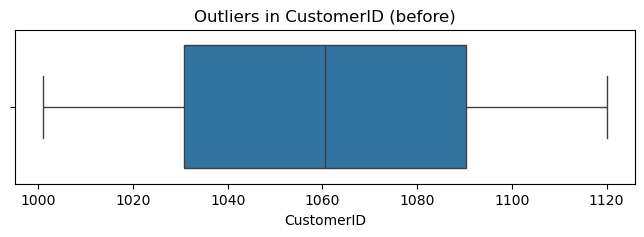

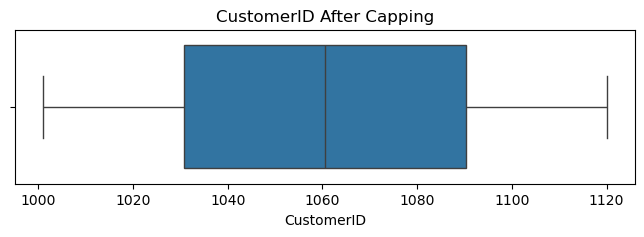

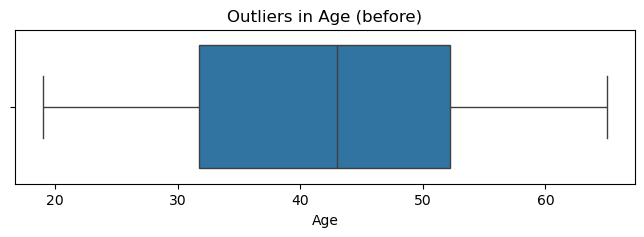

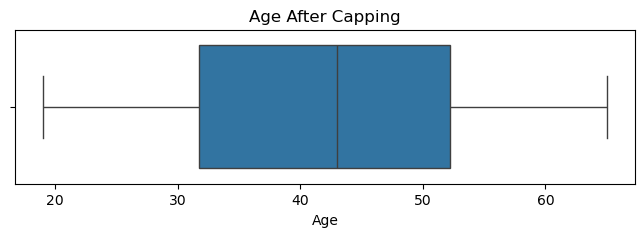

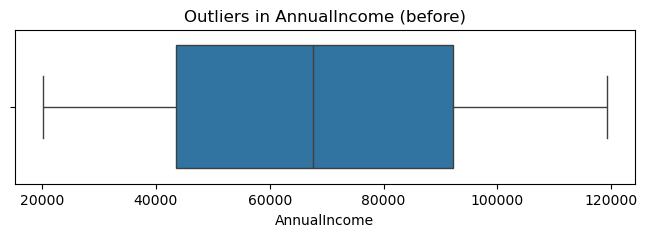

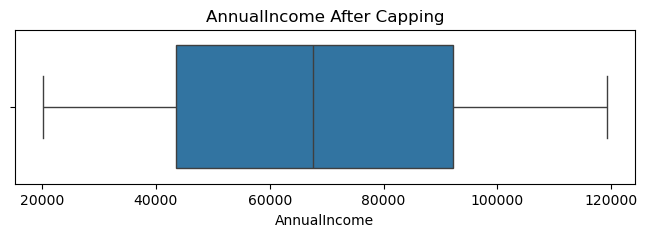

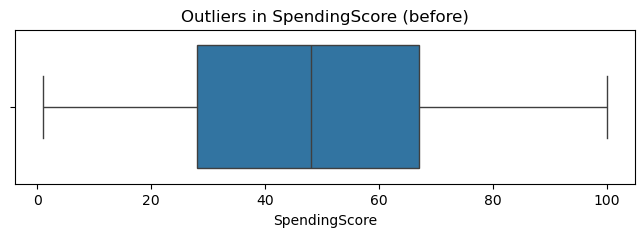

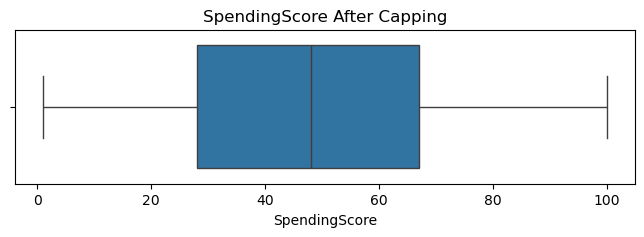

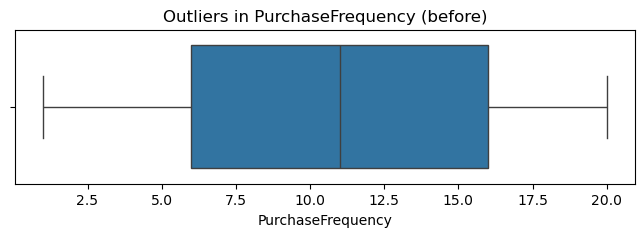

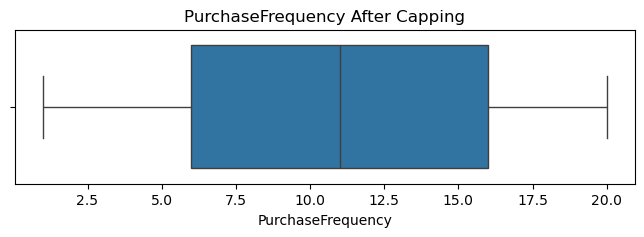

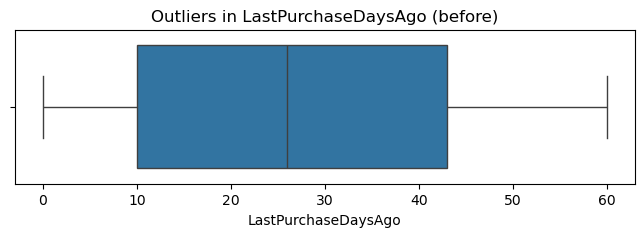

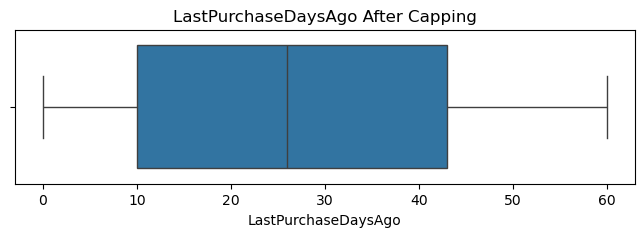


📊 Outlier Summary:

▶ CustomerID
   - Outlier_Count: 0
   - Percent: 0.0
   - Decision: Capped
   - IQR_Bounds: (np.float64(941.5), np.float64(1179.5))

▶ Age
   - Outlier_Count: 0
   - Percent: 0.0
   - Decision: Capped
   - IQR_Bounds: (np.float64(1.0), np.float64(83.0))

▶ AnnualIncome
   - Outlier_Count: 0
   - Percent: 0.0
   - Decision: Capped
   - IQR_Bounds: (np.float64(-29345.62), np.float64(165217.38))

▶ SpendingScore
   - Outlier_Count: 0
   - Percent: 0.0
   - Decision: Capped
   - IQR_Bounds: (np.float64(-30.5), np.float64(125.5))

▶ PurchaseFrequency
   - Outlier_Count: 0
   - Percent: 0.0
   - Decision: Capped
   - IQR_Bounds: (np.float64(-9.0), np.float64(31.0))

▶ LastPurchaseDaysAgo
   - Outlier_Count: 0
   - Percent: 0.0
   - Decision: Capped
   - IQR_Bounds: (np.float64(-39.5), np.float64(92.5))


In [8]:
from scipy import stats
import numpy as np

# Load cleaned data
df = pd.read_csv("cleaned_ecommerce_customers.csv")
num_cols = df.select_dtypes(include=np.number).columns

outlier_summary = {}

for col in num_cols:
    col_data = df[col].dropna()
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    z_scores = np.abs(stats.zscore(col_data))
    zscore_outliers = col_data[z_scores > 3]
    iqr_outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]

    total_outliers = set(iqr_outliers.index).union(set(zscore_outliers.index))
    percent = round((len(total_outliers) / len(df)) * 100, 2)

    # Cap if < 5%
    if percent < 5:
        df[col] = np.where(df[col] > upper_bound, upper_bound,
                           np.where(df[col] < lower_bound, lower_bound, df[col]))
        decision = "Capped"
    else:
        decision = "Needs Review"

    outlier_summary[col] = {
        "Outlier_Count": len(total_outliers),
        "Percent": percent,
        "Decision": decision,
        "IQR_Bounds": (round(lower_bound, 2), round(upper_bound, 2))
    }

    # Boxplot before/after
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=col_data)
    plt.title(f"Outliers in {col} (before)")
    plt.show()

    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f"{col} After Capping")
    plt.show()

# Save and show summary
df.to_csv("outlier_treated_ecommerce_customers.csv", index=False)

print("\n📊 Outlier Summary:")
for col, info in outlier_summary.items():
    print(f"\n▶ {col}")
    for k, v in info.items():
        print(f"   - {k}: {v}")


Task 4: Feature Engineering + Visual Exploration

     CustomerID  CustomerTenureDays  AvgOrderValue  DaysSinceLastOrder   Age  \
0        1001.0                2995   29566.500000                31.0  23.0   
1        1002.0                2561    5994.166667                10.0  57.0   
2        1003.0                2725    7076.875000                 9.0  50.0   
3        1004.0                2760   69083.000000                50.0  50.0   
4        1005.0                2217    8427.461538                 4.0  50.0   
..          ...                 ...            ...                 ...   ...   
115      1116.0                3649   10645.833333                 2.0  43.0   
116      1117.0                2817    8126.666667                 6.0  58.0   
117      1118.0                1974    4234.055556                38.0  59.0   
118      1119.0                2371    4394.714286                 5.0  48.0   
119      1120.0                2992    8622.125000                47.0  56.0   

    AgeGroup  AnnualIncome IncomeBracke

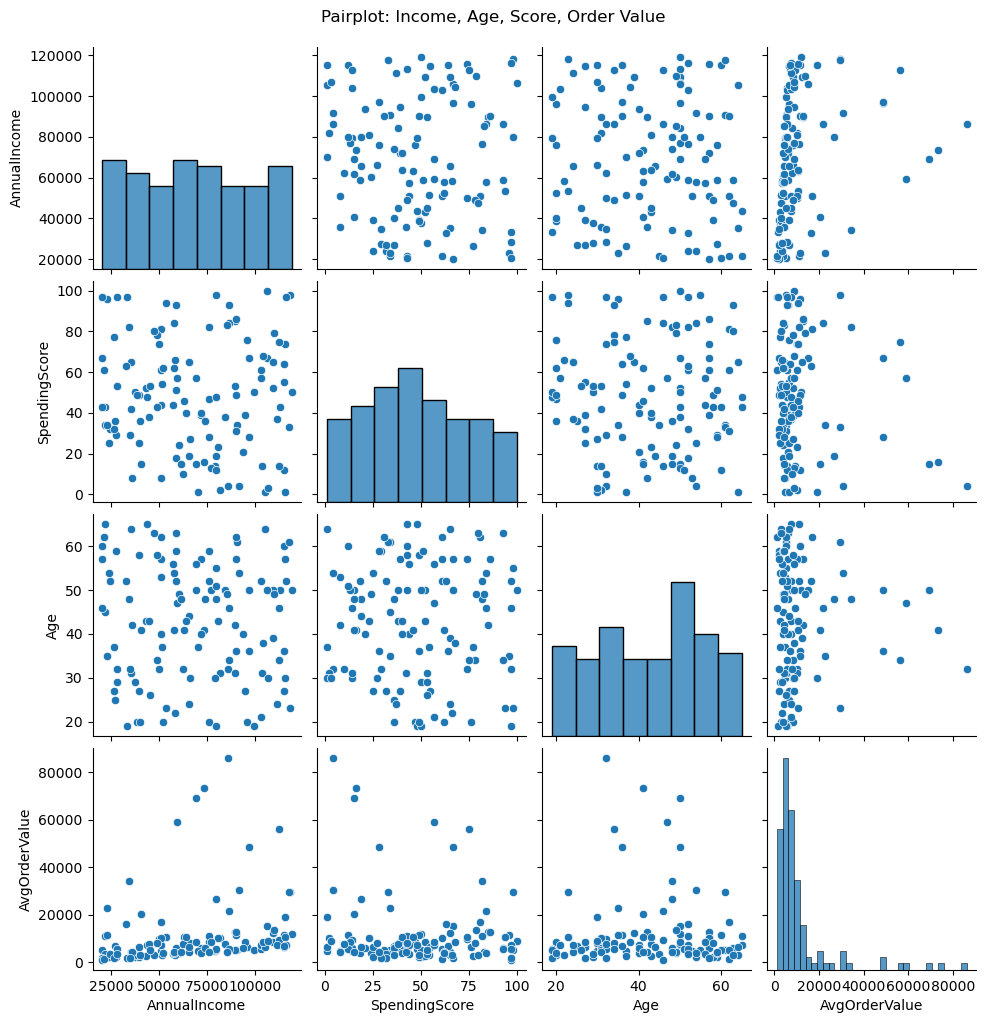

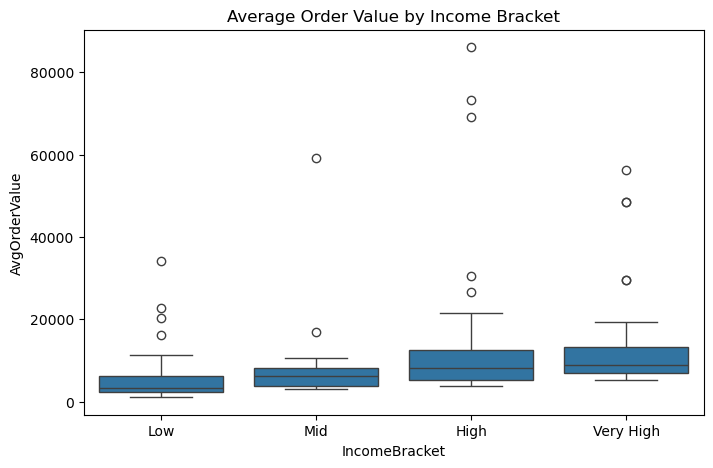

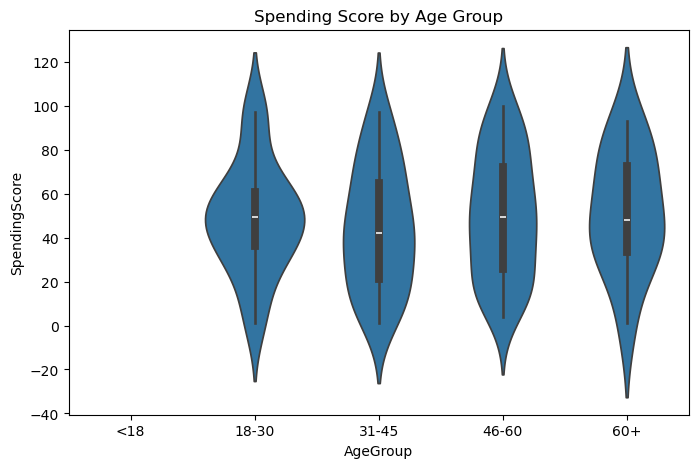

In [11]:
# Reload treated dataset
df = pd.read_csv("outlier_treated_ecommerce_customers.csv")
feature_data = df.copy()

# RegistrationDate and Tenure
np.random.seed(42)
feature_data["RegistrationDate"] = pd.to_datetime(
    np.random.choice(pd.date_range("2015-01-01", "2022-01-01"), size=len(feature_data))
)
feature_data["CustomerTenureDays"] = (pd.Timestamp.today() - feature_data["RegistrationDate"]).dt.days

# Average Order Value
feature_data["AvgOrderValue"] = feature_data["AnnualIncome"] / feature_data["PurchaseFrequency"]
##feature_data["AvgOrderValue"].replace([np.inf, -np.inf], np.nan, inplace=True)
feature_data["AvgOrderValue"] = feature_data["AvgOrderValue"].replace([np.inf, -np.inf], np.nan)


# Rename
feature_data.rename(columns={"LastPurchaseDaysAgo": "DaysSinceLastOrder"}, inplace=True)

# Age Groups
feature_data["AgeGroup"] = pd.cut(
    feature_data["Age"], bins=[0, 18, 30, 45, 60, 100],
    labels=["<18", "18-30", "31-45", "46-60", "60+"]
)

# Income Brackets
feature_data["IncomeBracket"] = pd.qcut(
    feature_data["AnnualIncome"], q=4,
    labels=["Low", "Mid", "High", "Very High"]
)

# Spending Category
feature_data["SpendingCategory"] = pd.cut(
    feature_data["SpendingScore"], bins=[-1, 30, 60, 100],
    labels=["Low", "Medium", "High"]
)

# Income Per Order
feature_data["IncomePerOrder"] = feature_data["AnnualIncome"] / feature_data["PurchaseFrequency"]
##feature_data["IncomePerOrder"].replace([np.inf, -np.inf], np.nan, inplace=True)
feature_data["IncomePerOrder"] = feature_data["IncomePerOrder"].replace([np.inf, -np.inf], np.nan)


# Final Feature Summary Table
print(feature_data[[
    "CustomerID", "CustomerTenureDays", "AvgOrderValue", "DaysSinceLastOrder",
    "Age", "AgeGroup", "AnnualIncome", "IncomeBracket",
    "SpendingScore", "SpendingCategory", "IncomePerOrder"
]])

# -------------------------------
# 📊 Feature Visualization
# -------------------------------
sns.pairplot(feature_data[["AnnualIncome", "SpendingScore", "Age", "AvgOrderValue"]])
plt.suptitle("Pairplot: Income, Age, Score, Order Value", y=1.02)
plt.show()

# Boxplot of Avg Order Value by Income Bracket
plt.figure(figsize=(8, 5))
sns.boxplot(data=feature_data, x="IncomeBracket", y="AvgOrderValue")
plt.title("Average Order Value by Income Bracket")
plt.show()

# Violin Plot for Age vs Spending Score
plt.figure(figsize=(8, 5))
sns.violinplot(data=feature_data, x="AgeGroup", y="SpendingScore")
plt.title("Spending Score by Age Group")
plt.show()
